In [1]:
import missingno as msno
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import numpy as np

D:\Anaconda\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "D:\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "D:\Anaconda\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.as

In [2]:
data = pd.read_csv("energydata_complete.csv",parse_dates=['date'])
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
data.shape

(19735, 29)

In [4]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
data.rename(columns={'T1': 'temp_kitchen', 'RH_1': 'hum_kitchen', 'T2': 'temp_living', 'RH_2': 'hum_living','T3': 'temp_laundry', 'RH_3': 'hum_laundry','T4': 'temp_office', 'RH_4': 'hum_office','T5': 'temp_bathroom', 'RH_5': 'hum_bathroom','T6': 'temp_building_out', 'RH_6': 'hum_building_out','T7': 'temp_ironing', 'RH_7': 'hum_ironing','T8': 'temp_teenRoom', 'RH_8': 'hum_teenRoom','T9': 'temp_parentRoom', 'RH_9': 'hum_parentRoom', 'T_out': 'temp_out', 'RH_out': 'hum_out', 'Press_mm_hg': 'Pressure' }, inplace=True)

In [6]:
data.columns

Index(['date', 'Appliances', 'lights', 'temp_kitchen', 'hum_kitchen',
       'temp_living', 'hum_living', 'temp_laundry', 'hum_laundry',
       'temp_office', 'hum_office', 'temp_bathroom', 'hum_bathroom',
       'temp_building_out', 'hum_building_out', 'temp_ironing', 'hum_ironing',
       'temp_teenRoom', 'hum_teenRoom', 'temp_parentRoom', 'hum_parentRoom',
       'temp_out', 'Pressure', 'hum_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [7]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['month'] = data['date'].dt.month
data['time'] = data['date'].dt.time
data['hour'] = data['date'].dt.hour
data['day'] =  data['date'].dt.day
data['seconds'] = data['hour']*3600 + data['date'].dt.minute*60 + data['date'].dt.second
data['day_of_week'] = data['date'].dt.weekday_name
data['Numerical_Week'] = data['date'].dt.weekday
data['calweek'] = data['date'].dt.dayofweek
data['weekType'] = np.where(data['calweek'] < 5, 'Weekday', 'Weekend')

data.head()

,date,Appliances,lights,temp_kitchen,hum_kitchen,temp_living,hum_living,temp_laundry,hum_laundry,temp_office,...,rv2,month,time,hour,day,seconds,day_of_week,Numerical_Week,calweek,weekType
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,1,17:00:00,17,11,61200,Monday,0,0,Weekday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,1,17:10:00,17,11,61800,Monday,0,0,Weekday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,1,17:20:00,17,11,62400,Monday,0,0,Weekday
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,1,17:30:00,17,11,63000,Monday,0,0,Weekday
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,1,17:40:00,17,11,63600,Monday,0,0,Weekday


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 38 columns):
date                 19735 non-null datetime64[ns]
Appliances           19735 non-null int64
lights               19735 non-null int64
temp_kitchen         19735 non-null float64
hum_kitchen          19735 non-null float64
temp_living          19735 non-null float64
hum_living           19735 non-null float64
temp_laundry         19735 non-null float64
hum_laundry          19735 non-null float64
temp_office          19735 non-null float64
hum_office           19735 non-null float64
temp_bathroom        19735 non-null float64
hum_bathroom         19735 non-null float64
temp_building_out    19735 non-null float64
hum_building_out     19735 non-null float64
temp_ironing         19735 non-null float64
hum_ironing          19735 non-null float64
temp_teenRoom        19735 non-null float64
hum_teenRoom         19735 non-null float64
temp_parentRoom      19735 non-null float64
hum_pare

In [9]:
pandas_profiling.ProfileReport(data)

Number of variables,38
Number of observations,19735
Total Missing (%),0.0%
Total size in memory,5.7 MiB
Average record size in memory,304.0 B
Numeric,29
Categorical,3
Boolean,0
Date,1
Text (Unique),0
Rejected,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B79F9D38D0>,
      dtype=object)

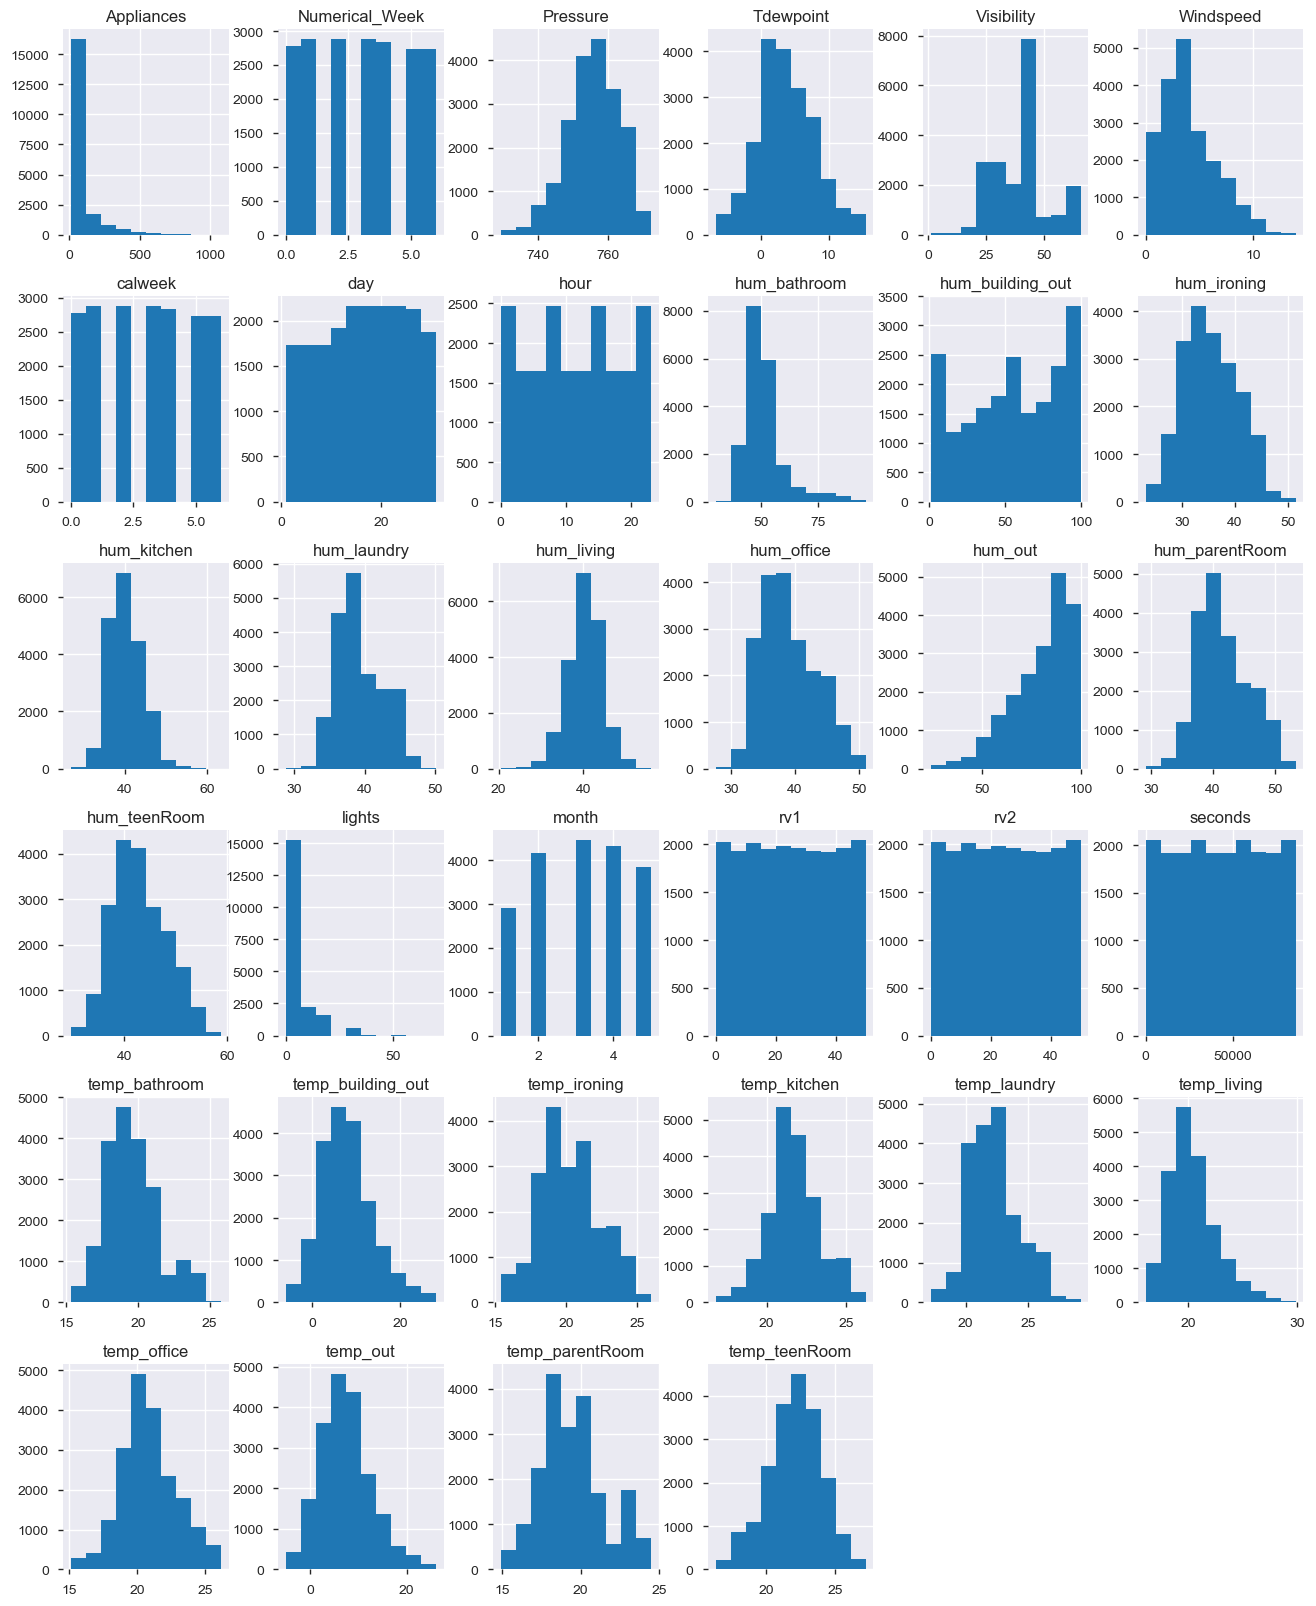

In [10]:
data.hist(figsize = (16,20))

We can see a fair amount of information from the distributions above.

In general, the sensor distributions are similar "floor-wise" (first floor sensor nodes 1-4; second floor sensor nodes 5 & 7-9).
Relative humidity outside the home (sensor node 6) is distributed across the full range of the variable (0-100%). Further evaluation will be necessary to access quality of this data (can we use domain knowledge to eliminate variable).
Relative humidity at the airport is concentrated above 75% humidity.
The distribution of outdoor temperatures (T6 and T_out) are very similar.
Appliance power is skewed towards the low side of the histogram.
Pressure seems to have some sort of normal distribution.
Lighting power is skewed towards the low end.
Visibility have a very dispersed distribution.
Wind speed skewed towards lower end of histogram.

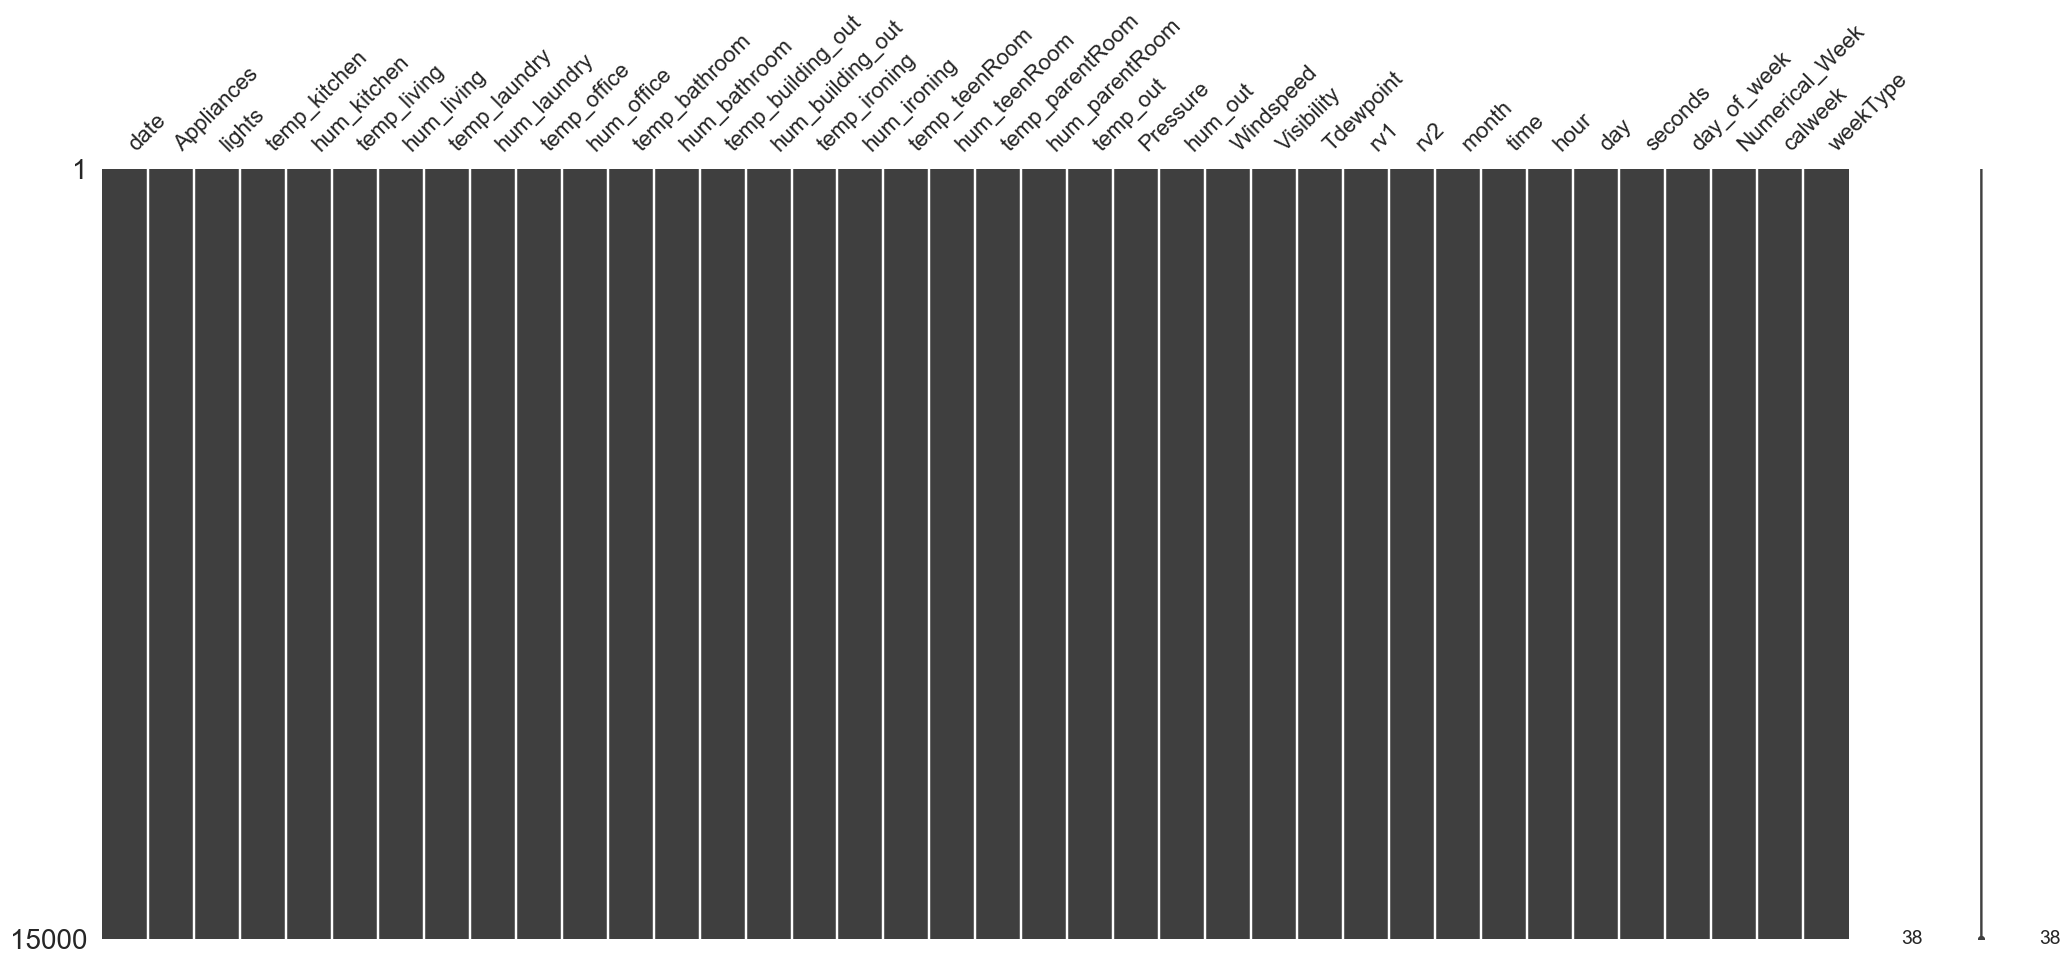

In [11]:

msno.matrix(data.sample(15000))

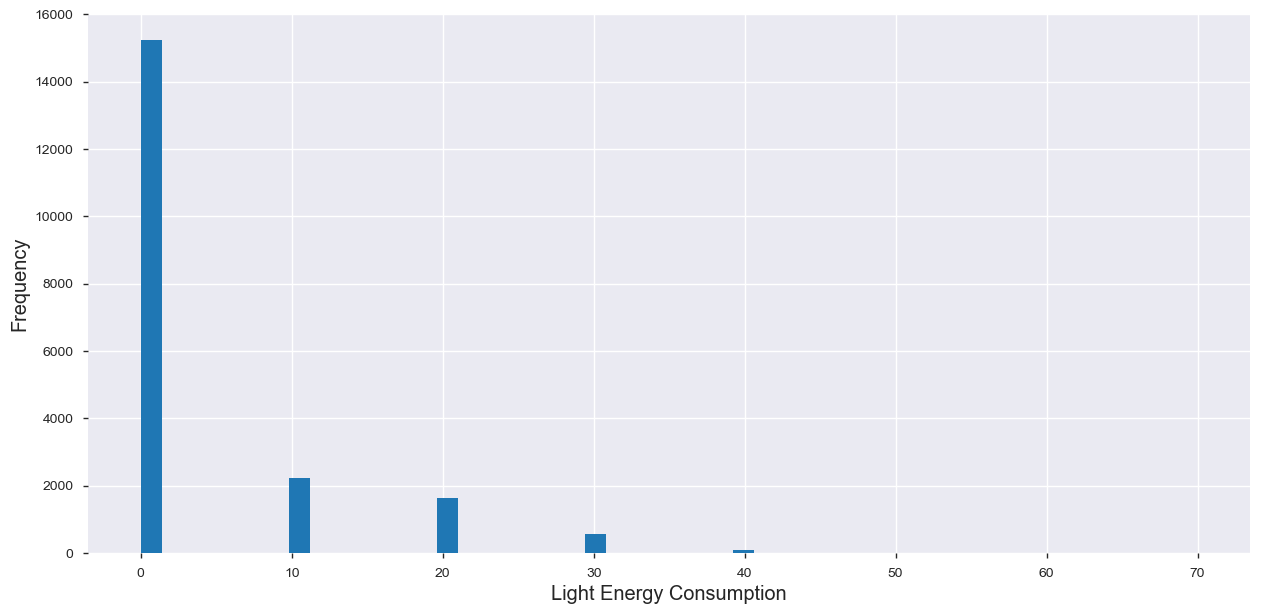

In [12]:
plt.xlabel("Light Energy Consumption", fontsize="x-large")
plt.ylabel("Frequency", fontsize="x-large")
data["lights"].hist(figsize=(15,7), bins=50)

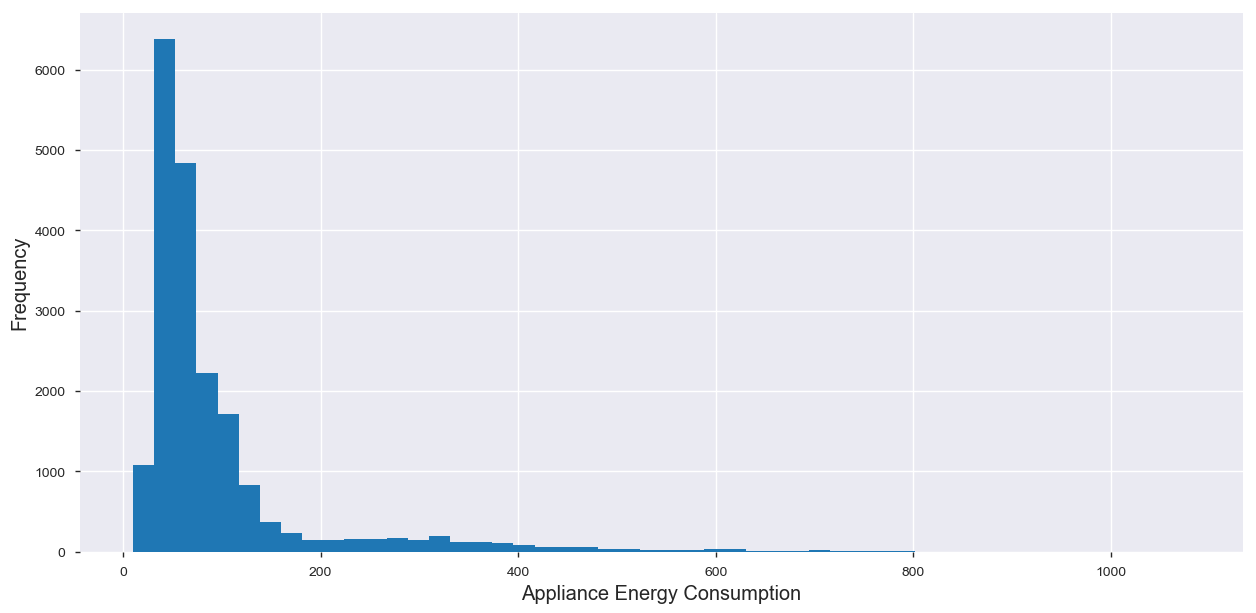

In [13]:
plt.xlabel("Appliance Energy Consumption", fontsize="x-large")
plt.ylabel("Frequency", fontsize="x-large")
data["Appliances"].hist(figsize=(15,7), bins=50)

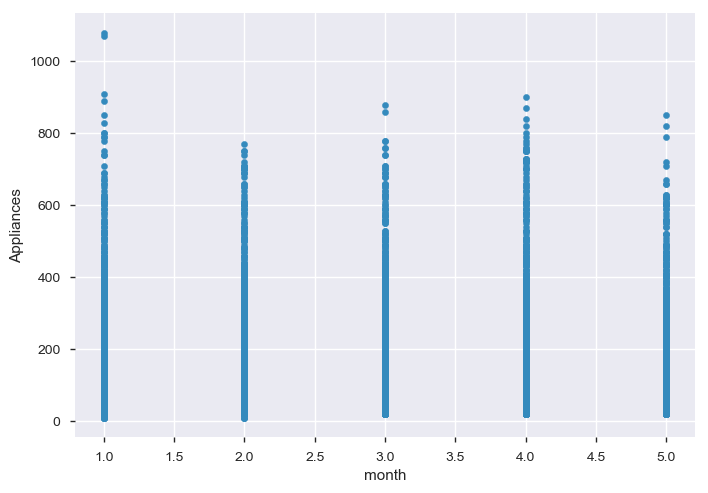

In [14]:
data.plot(kind="scatter", x="month", y="Appliances")
plt.show()

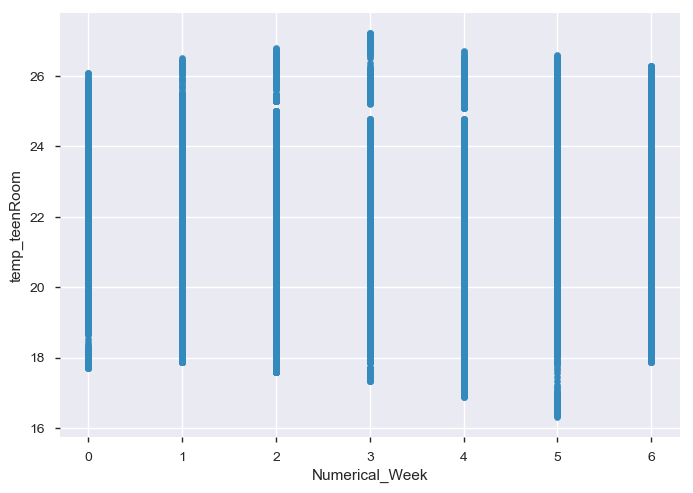

In [15]:
data.plot(kind="scatter", x="Numerical_Week", y="temp_teenRoom")
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


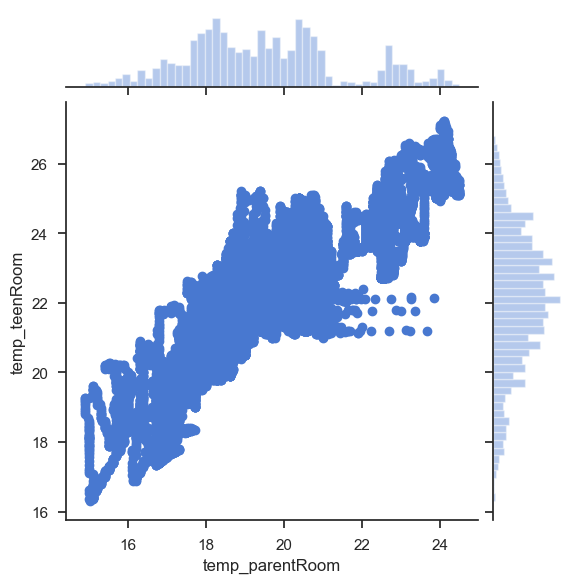

In [16]:
sns.set(style="ticks", palette="muted")
sns.jointplot(x="temp_parentRoom", y="temp_teenRoom", data = data)

Text(0.5,1,'Humidity in Living room vs Pressure')

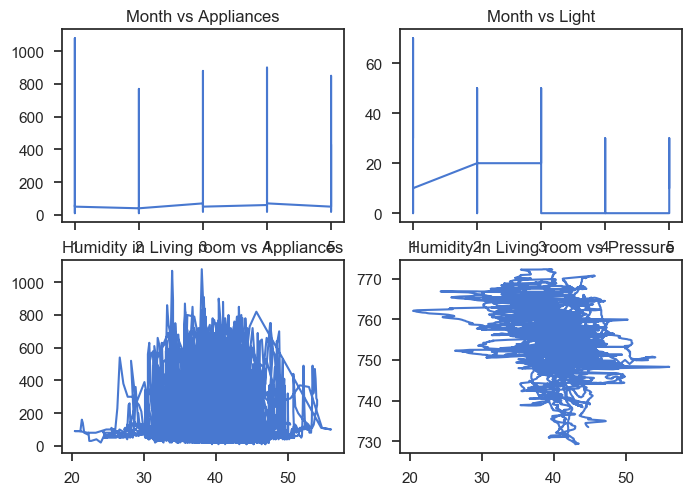

In [17]:
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(data["month"], data["Appliances"])
axarr[0, 0].set_title('Month vs Appliances')
axarr[0, 1].plot(data["month"], data["lights"])
axarr[0, 1].set_title('Month vs Light')
axarr[1, 0].plot(data["hum_living"], data["Appliances"])
axarr[1, 0].set_title('Humidity in Living room vs Appliances')
axarr[1, 1].plot(data["hum_living"], data["Pressure"])
axarr[1, 1].set_title('Humidity in Living room vs Pressure')


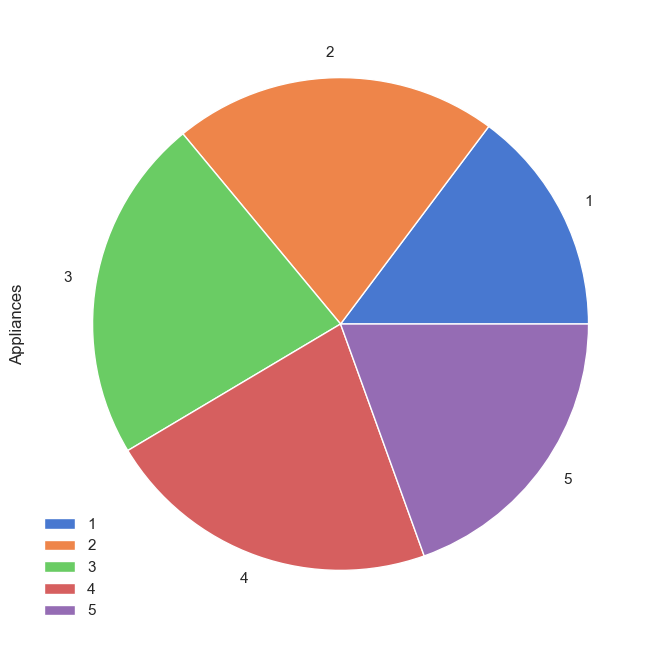

In [18]:
data.groupby("month").count().plot.pie(y=["Appliances"], figsize=(8,8))

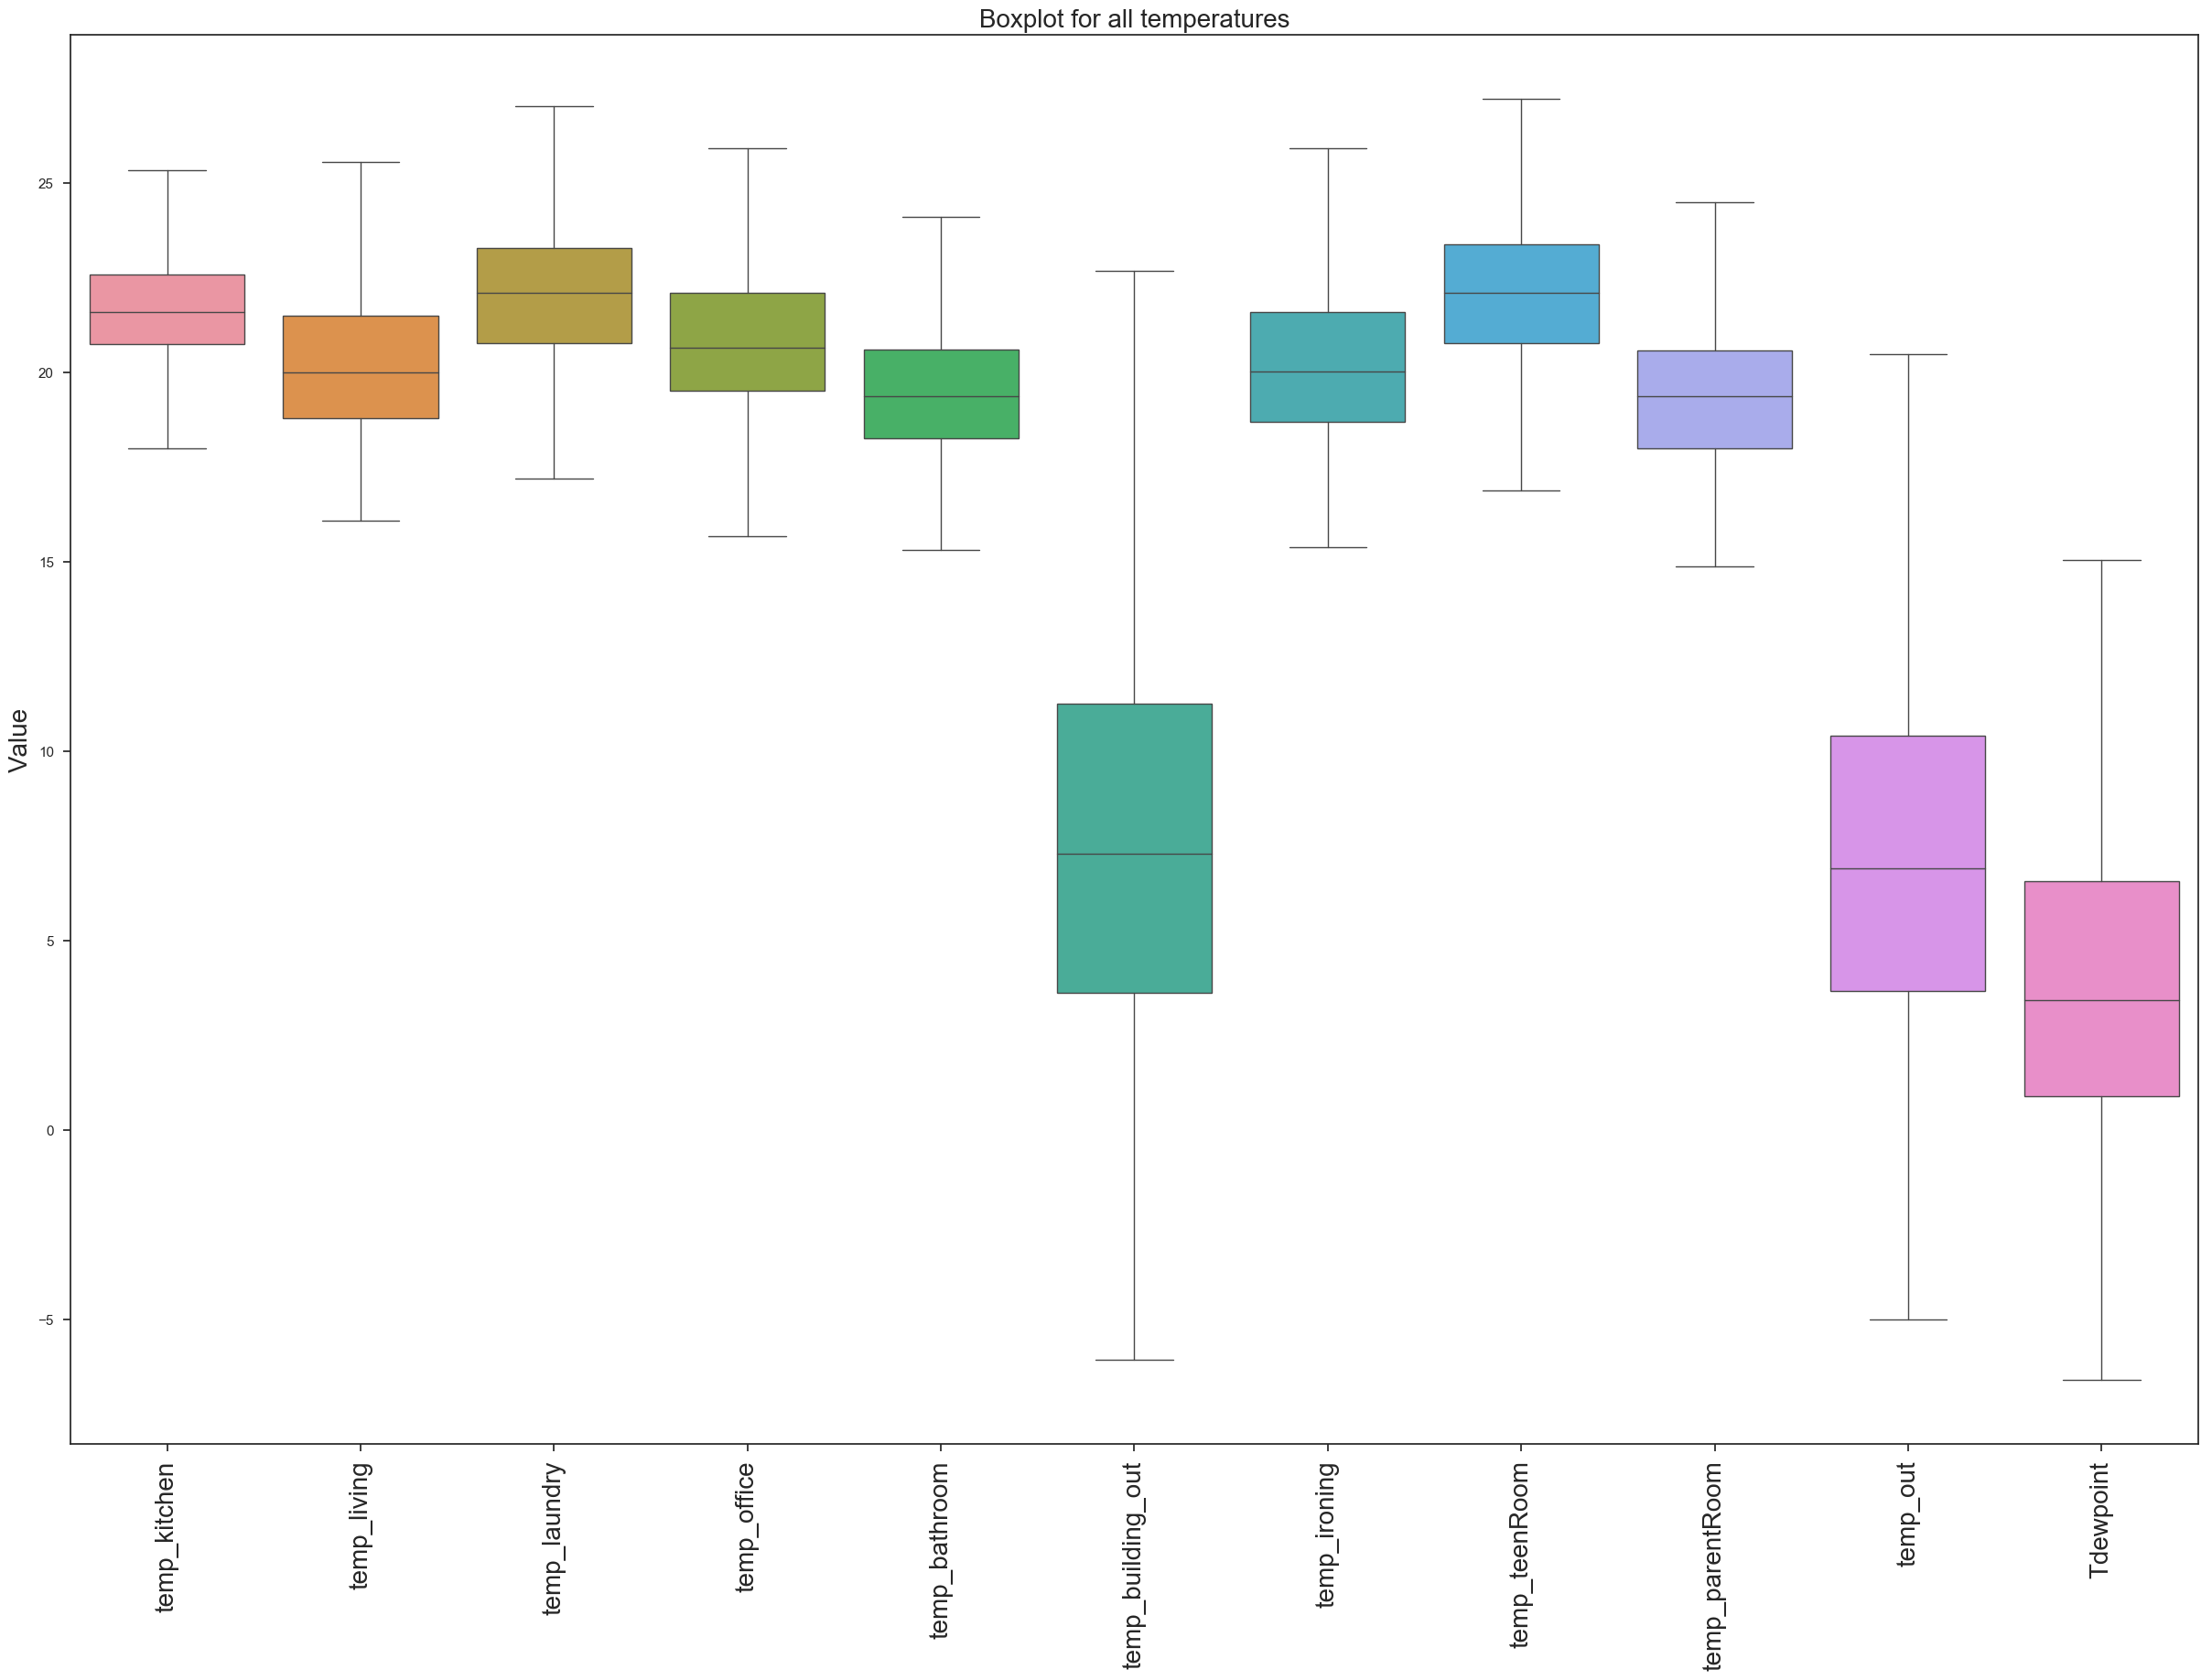

In [19]:
def doBoxplot(data, title):
    sns.mpl.rc('figure', figsize=(30,20))
    ax = sns.boxplot(data=data, linewidth=1, showfliers=False)
    list = ax.set_xticklabels(labels = data.columns, rotation='vertical', fontdict={'fontsize':'20'})
    list = ax.set_title(title, fontdict={'fontsize':'20'})
    list = ax.set_ylabel('Value', fontdict={'fontsize':'20'})

boxdf = data.loc[:,['temp_kitchen', 'temp_living','temp_laundry', 'temp_office', 'temp_bathroom', 'temp_building_out', 'temp_ironing', 'temp_teenRoom', 'temp_parentRoom', 'temp_out', 'Tdewpoint']]
box2df = data.loc[:,['hum_kitchen', 'hum_living', 'hum_laundry', 'hum_office', 'hum_bathroom', 'hum_building_out', 'hum_ironing', 'hum_teenRoom', 'hum_parentRoom', 'hum_out']]
doBoxplot(boxdf, 'Boxplot for all temperatures')

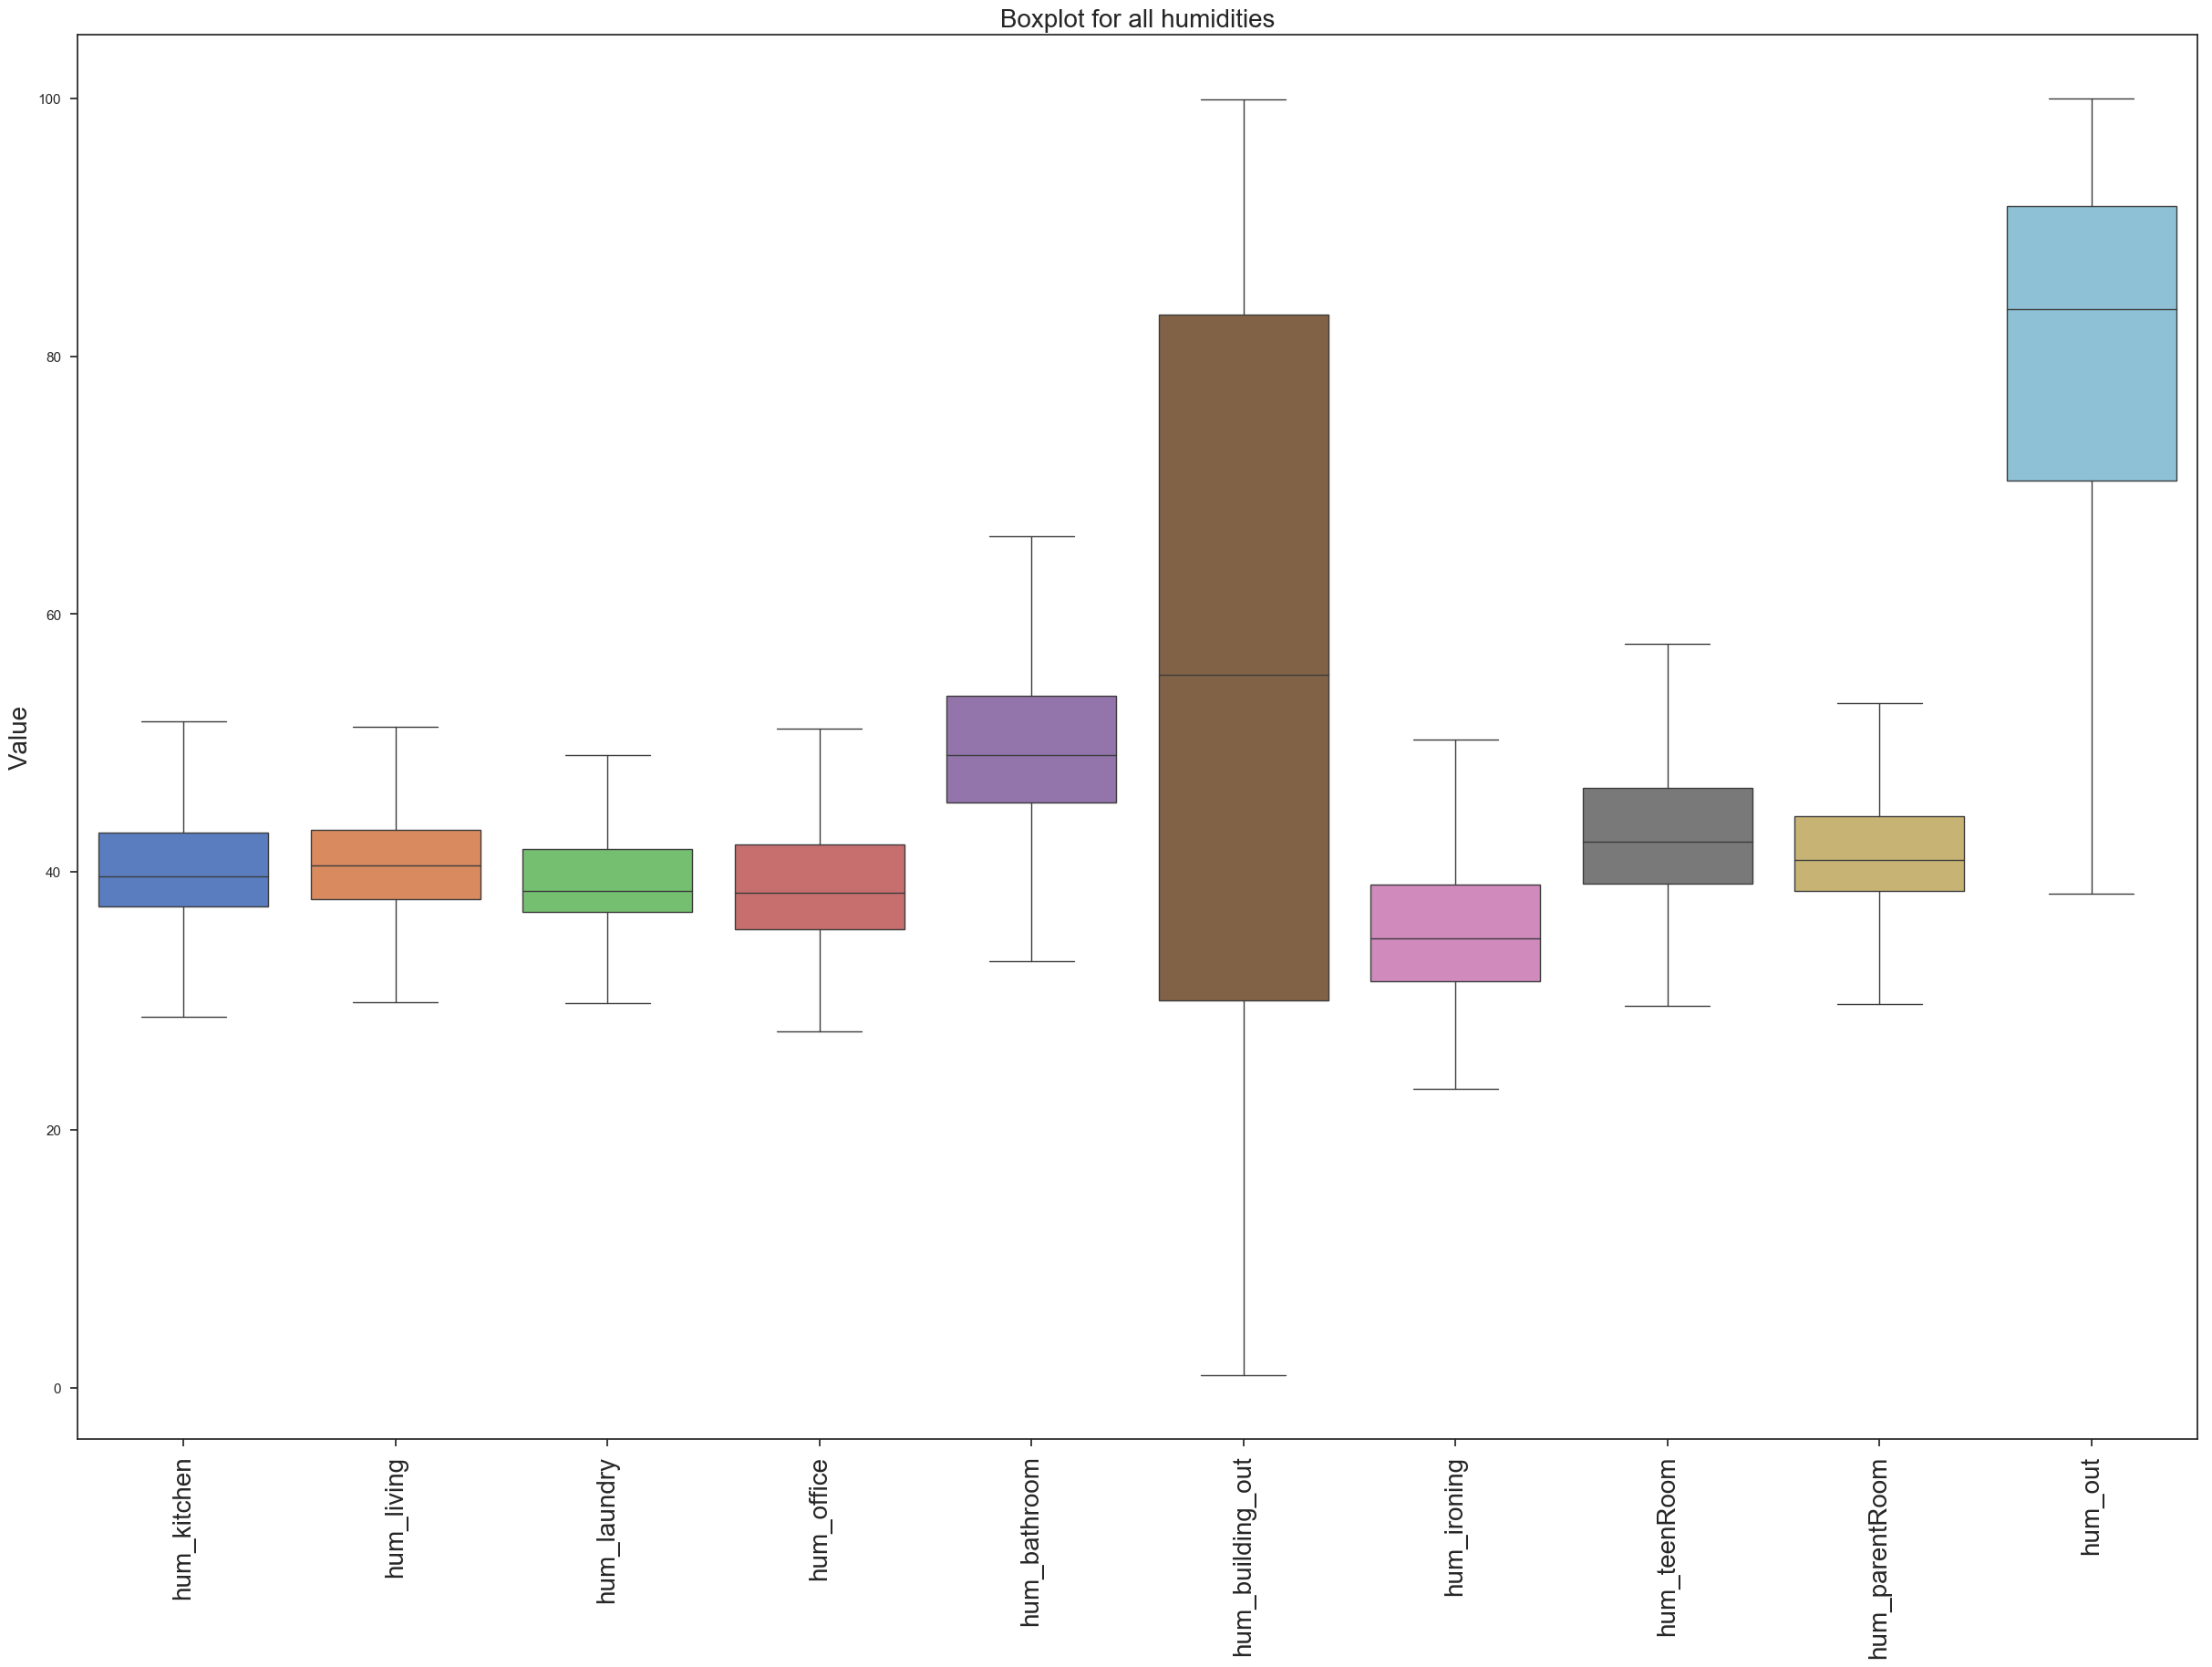

In [20]:
doBoxplot(box2df, 'Boxplot for all humidities')

In [21]:
data.corr(method='pearson', min_periods=1)

,Appliances,lights,temp_kitchen,hum_kitchen,temp_living,hum_living,temp_laundry,hum_laundry,temp_office,hum_office,...,Visibility,Tdewpoint,rv1,rv2,month,hour,day,seconds,Numerical_Week,calweek
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.000230,0.015353,-0.011145,-0.011145,-0.011606,0.216792,0.002366,0.217152,0.003060,0.003060
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,0.020038,-0.036322,0.000521,0.000521,-0.179452,0.255346,-0.041895,0.254993,-0.099828,-0.099828
temp_kitchen,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,-0.076210,0.571309,-0.006203,-0.006203,0.706305,0.178858,-0.127088,0.178728,0.001381,0.001381
hum_kitchen,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,-0.021057,0.639106,-0.000699,-0.000699,-0.094048,0.018594,-0.041397,0.018531,-0.053782,-0.053782
temp_living,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,-0.069721,0.582602,-0.011087,-0.011087,0.533479,0.254784,-0.156913,0.254569,0.000602,0.000602
hum_living,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,-0.005368,0.499152,0.006275,0.006275,-0.097914,-0.183322,0.037117,-0.183182,-0.044249,-0.044249
temp_laundry,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,-0.102310,0.645886,-0.005194,-0.005194,0.790365,0.037624,-0.077190,0.037607,-0.017514,-0.017514
hum_laundry,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,0.017041,0.414387,-0.000477,-0.000477,-0.414359,-0.052392,-0.048427,-0.052343,-0.035182,-0.035182
temp_office,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,-0.104768,0.519471,-0.001815,-0.001815,0.789168,0.088407,-0.121867,0.088334,-0.091006,-0.091006
hum_office,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,0.002636,0.616509,-0.001787,-0.001787,-0.258167,-0.019068,-0.005404,-0.019040,-0.005749,-0.005749


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


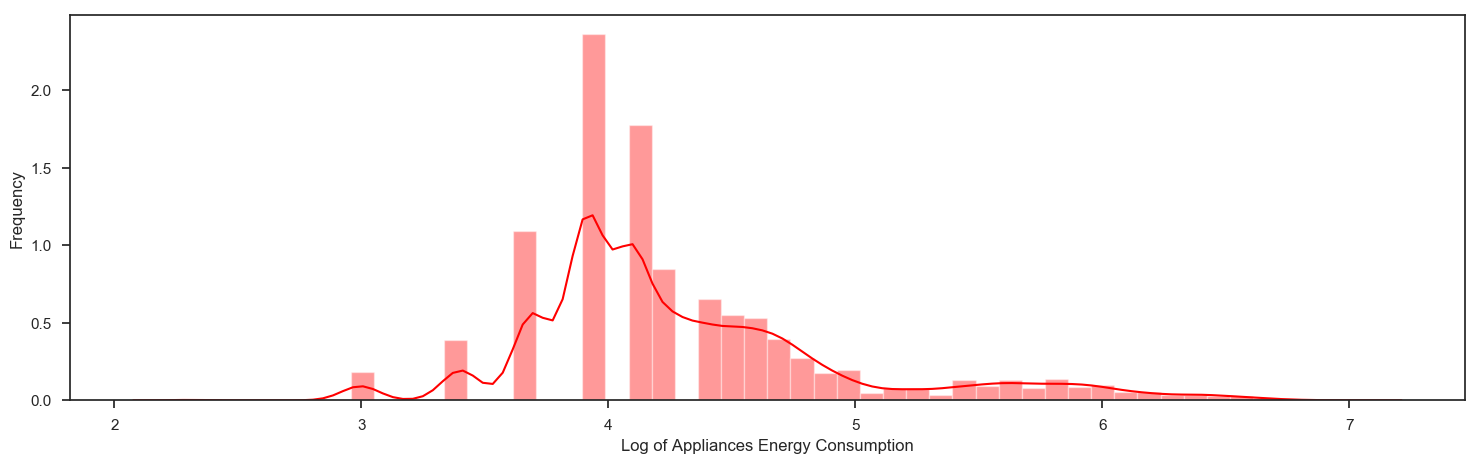

In [22]:
fig, ax1 = plt.subplots(figsize=(18,5))
sns.distplot(data.Appliances.apply(np.log), kde=True, color="red", ax=ax1)
ax1.set_ylabel("Frequency");
ax1.set_xlabel("Log of Appliances Energy Consumption");

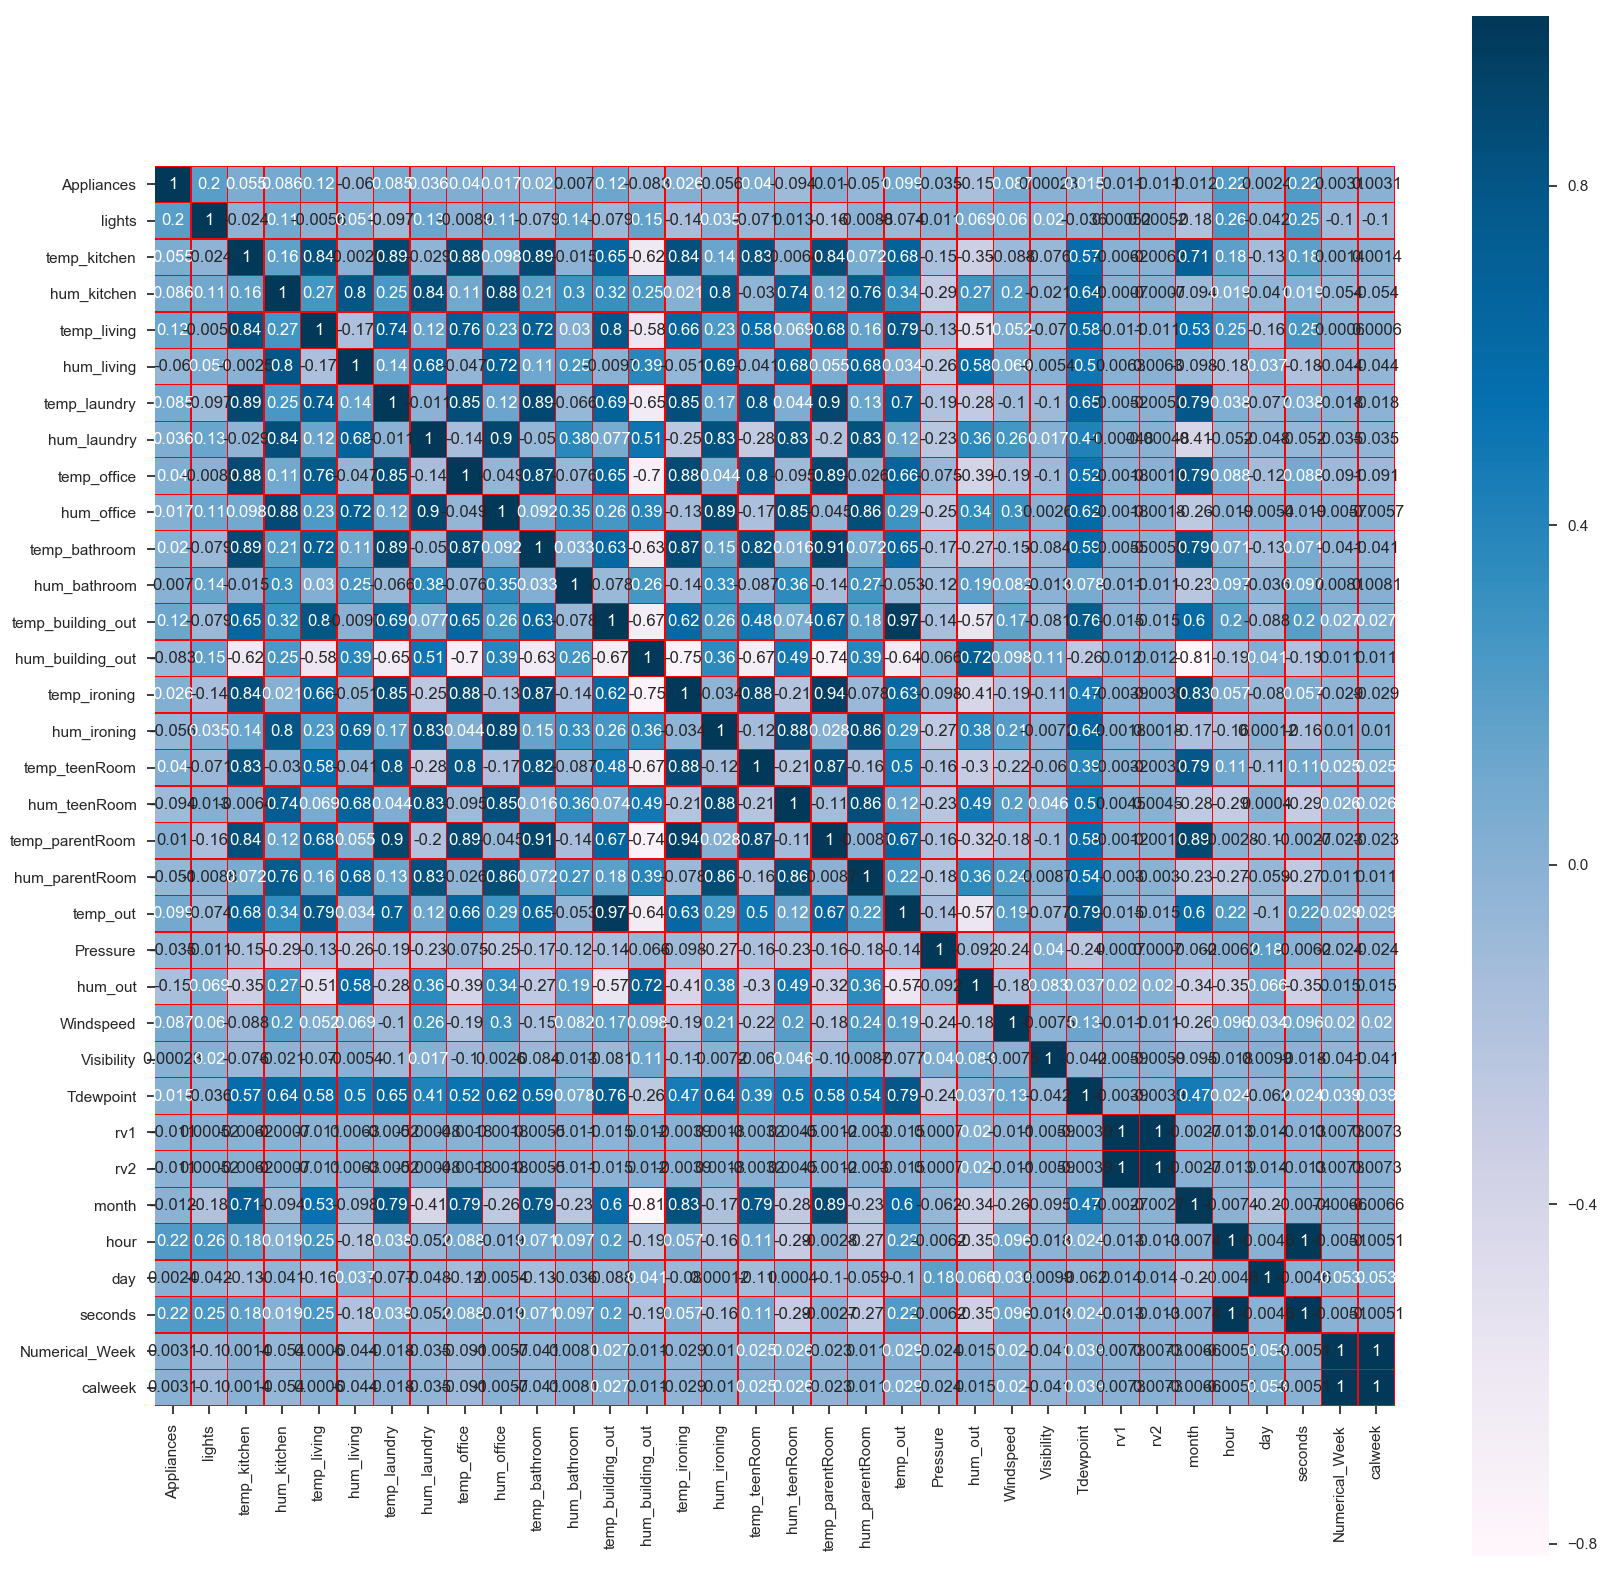

In [23]:
corr_mat=data.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='PuBu', linecolor='red', linewidths=0.25)

In [24]:
data.head()

,date,Appliances,lights,temp_kitchen,hum_kitchen,temp_living,hum_living,temp_laundry,hum_laundry,temp_office,...,rv2,month,time,hour,day,seconds,day_of_week,Numerical_Week,calweek,weekType
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,1,17:00:00,17,11,61200,Monday,0,0,Weekday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,1,17:10:00,17,11,61800,Monday,0,0,Weekday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,1,17:20:00,17,11,62400,Monday,0,0,Weekday
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,1,17:30:00,17,11,63000,Monday,0,0,Weekday
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,1,17:40:00,17,11,63600,Monday,0,0,Weekday


In [25]:
data = data.drop(['calweek'], axis=1)

In [26]:
data.to_csv('energydata_EDA.csv', index=False)